In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
syndir = join(figroot, "synopsis")
tuning_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis.pkl"))
tuning_stats_synopsis_df_fillmissing = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis_fill_missing.pkl"))
evol_stats_synopsis_df = pd.read_csv(join(syndir, f"ABCD_evol_stats_synopsis.csv"))

### Process the Tuning Axes

In [4]:
np.unique(tuning_stats_synopsis_df.lin_dist_num.values, return_counts=True)

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 11], dtype=int64),
 array([  4,   1,   2,   4,  10,   5, 309, 738, 172], dtype=int64))

In [5]:
tuning_stats_synopsis_df.head()

,space_name,eig_id,F_value,p_value,stats_str,lin_dist_set,lin_dist_num,avg_resp_per_lin_dist,max_resp_lin_dist,max_resp_val,Animal,Expi,ephysFN,stimuli,prefchan,prefunit
0,noise,0.0,3.465323,1.793685e-03,F-val: 3.47 | p-val: 1.8e-03,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[3.995903730392456, 1.479964256286621, 4.41176...",-0.16,16.845739,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0
1,noise,1.0,4.688895,8.846987e-05,F-val: 4.69 | p-val: 8.8e-05,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[8.657791137695312, 7.628445148468018, 18.1388...",-0.24,18.138840,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0
2,noise,2.0,2.228305,3.361004e-02,F-val: 2.23 | p-val: 3.4e-02,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[11.028430938720703, 6.682855129241943, 0.7399...",0.16,11.423381,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0
3,noise,3.0,13.480611,4.671396e-12,F-val: 13.48 | p-val: 4.7e-12,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[0.0, 3.3299193382263184, 26.63204002380371, 4...",-0.24,26.632040,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0
4,noise,5.0,3.396013,2.195186e-03,F-val: 3.40 | p-val: 2.2e-03,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[2.2199466228485107, 10.055503845214844, 2.959...",0.40,10.359751,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0


In [6]:
np.unique(tuning_stats_synopsis_df_fillmissing.lin_dist_num.values, return_counts=True)

(array([ 1,  4,  5,  6,  7,  8,  9, 11], dtype=int64),
 array([   4,    1,    2,    5,    9,   17, 1035,  172], dtype=int64))

In [7]:
# Filter rows where lin_dist_num == 8
filtered_df = tuning_stats_synopsis_df_fillmissing[tuning_stats_synopsis_df_fillmissing['lin_dist_num'] == 8]
# Check if 0.0 is missing from lin_dist_set using a lambda function
missing_zero = filtered_df['lin_dist_set'].apply(lambda x: 0.0 not in x)
print(f"0.0 is missing from lin_dist_set for lin_dist_num == 8: {missing_zero.all()}")


0.0 is missing from lin_dist_set for lin_dist_num == 8: False


In [8]:
tuning_stats_synopsis_df = tuning_stats_synopsis_df_fillmissing


### Solely Hessian Experimental Analysis

In [9]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

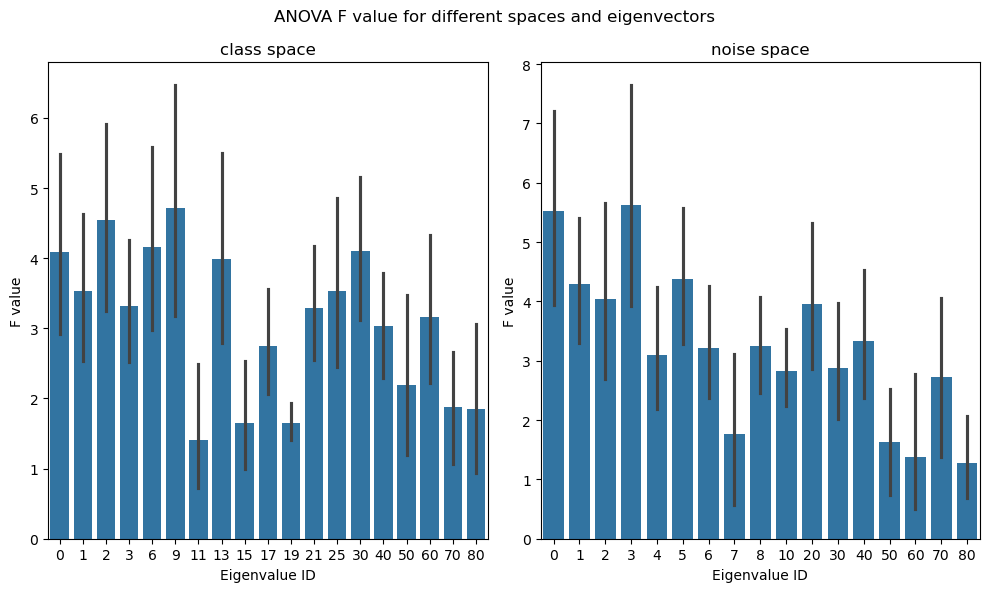

In [21]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0])
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('F value')

sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1])
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('F value')
fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()

In [22]:
len(tuning_stats_synopsis_df[["Animal", "Expi"]].drop_duplicates())

52

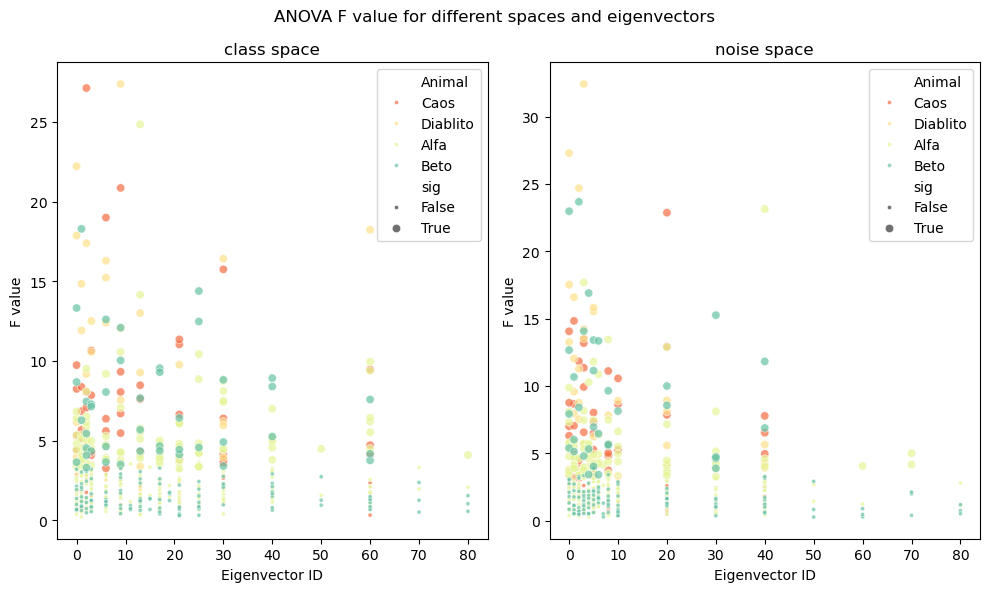

In [23]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()



In [24]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

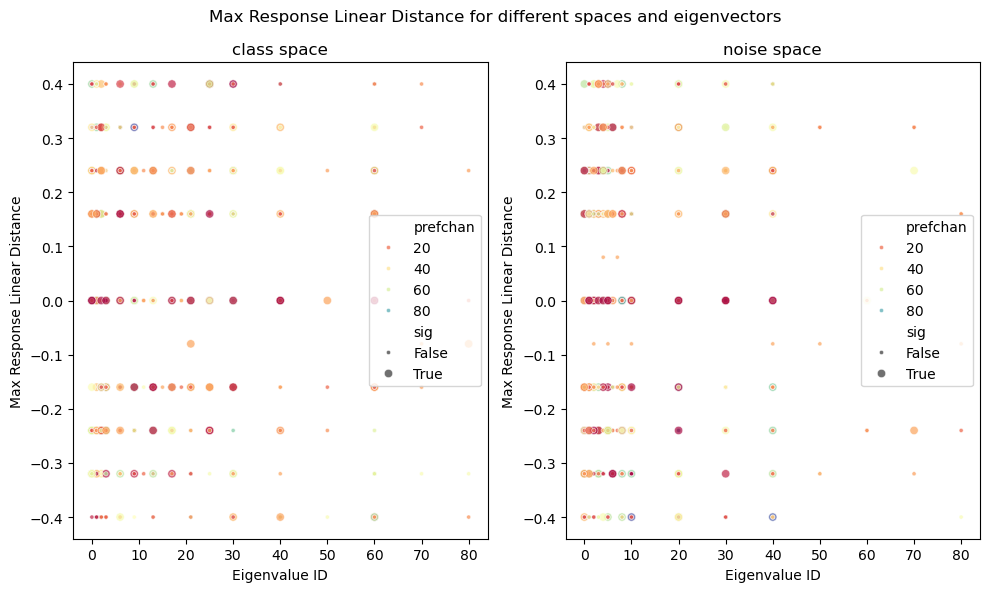

In [25]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors')
plt.tight_layout()
plt.show()
# %%

## Evolution Hessian interaction analysis

In [25]:
from core.utils.plot_utils import saveallforms

In [21]:
synfigdir = f"E:\OneDrive - Harvard University\BigGAN_Hessian\synopsis\Figures"

In [10]:
tuning_stats_synopsis_df = tuning_stats_synopsis_df_fillmissing

In [38]:
tuning_stats_synopsis_df['Exp_id'] = tuning_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)
evol_stats_synopsis_df['Exp_id'] = evol_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)

In [40]:
# find masks of evolution that succeed on thread 1 
success_str = "last - init p < 0.01"
BigGAN_success_explist = evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01")['Exp_id']
# find the corresponding masks in tuning stats
BigGAN_success_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id in @BigGAN_success_explist")
BigGAN_fail_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id not in @BigGAN_success_explist")
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# find the corresponding masks in tuning stats
print(f"BigGAN success mask shape: {BigGAN_success_mask_tuning_stats.shape}")
print(f"BigGAN fail mask shape: {BigGAN_fail_mask_tuning_stats.shape}")

BigGAN success mask shape: (714, 20)
BigGAN fail mask shape: (531, 20)


### Plot F value

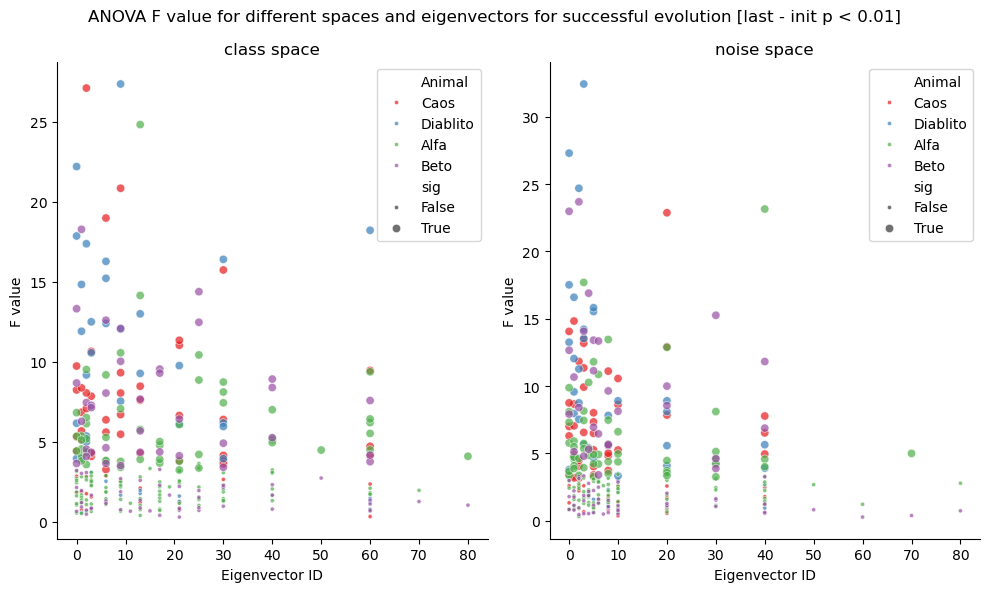

In [29]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
F_pval_threshold = 0.005
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle(f'ANOVA F value for different spaces and eigenvectors for successful evolution [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

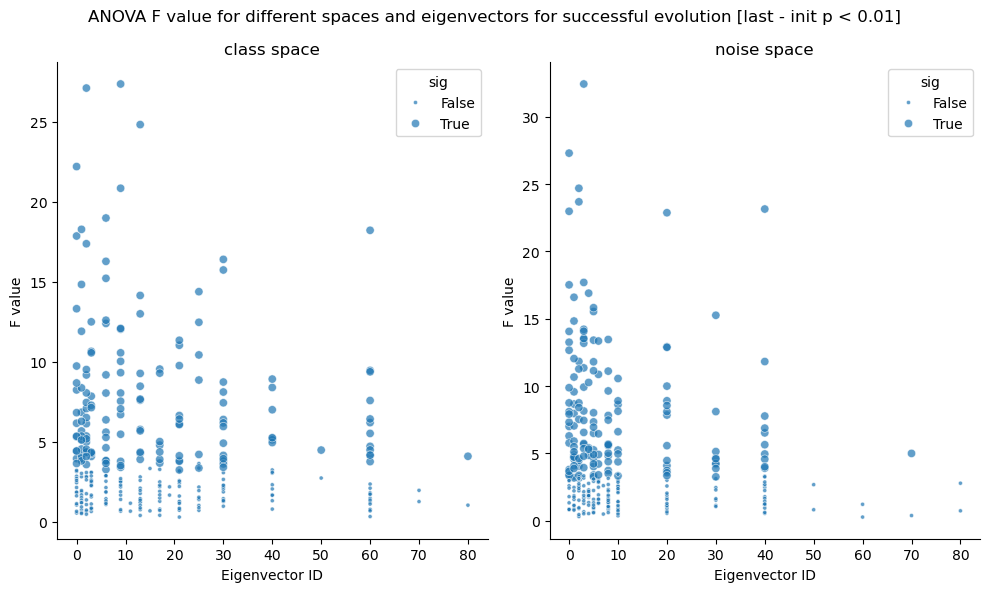

In [30]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
F_pval_threshold = 0.005
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle(f'ANOVA F value for different spaces and eigenvectors for successful evolution [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

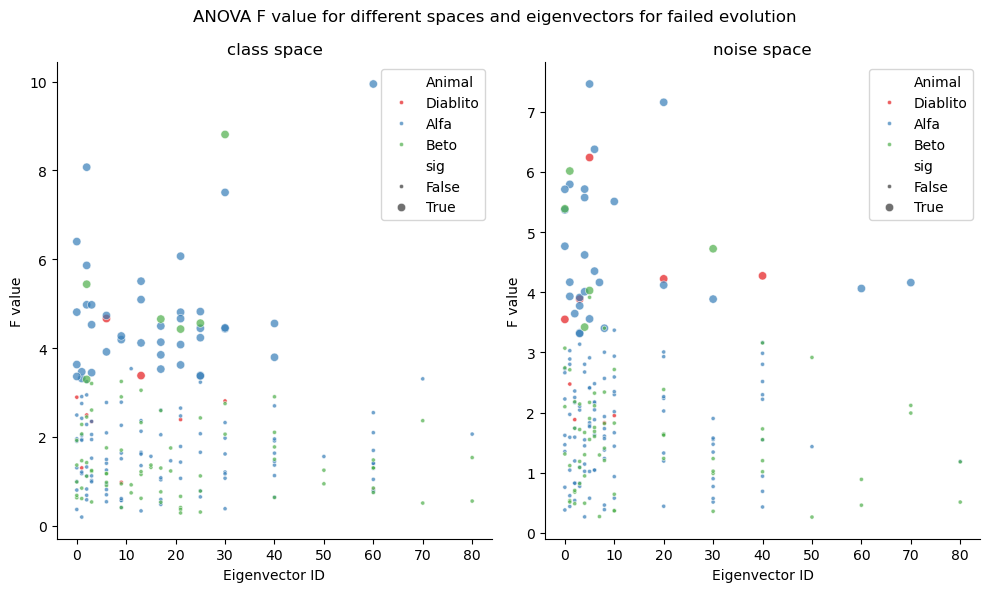

In [36]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_fail_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

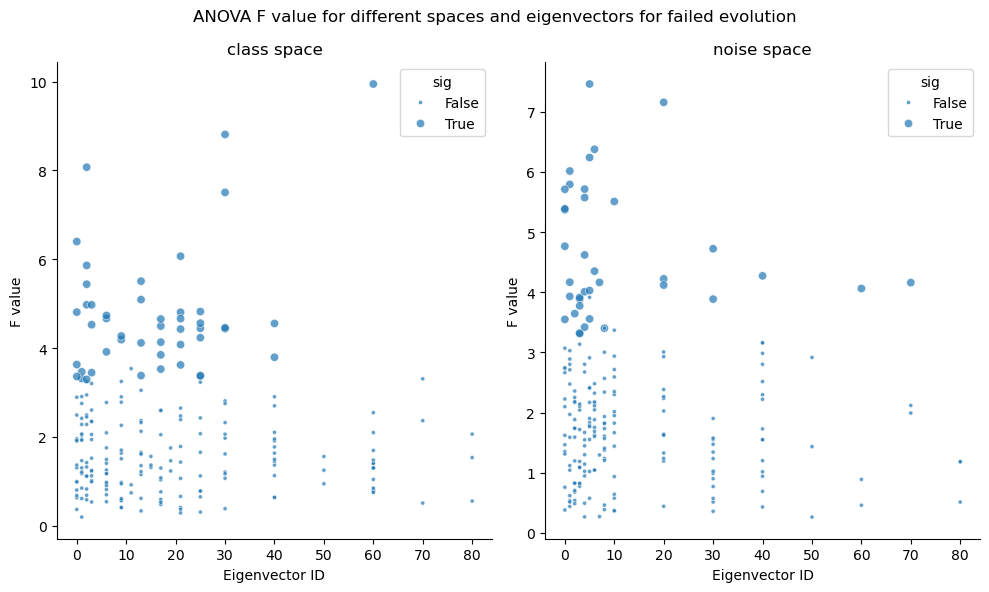

In [37]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_fail_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

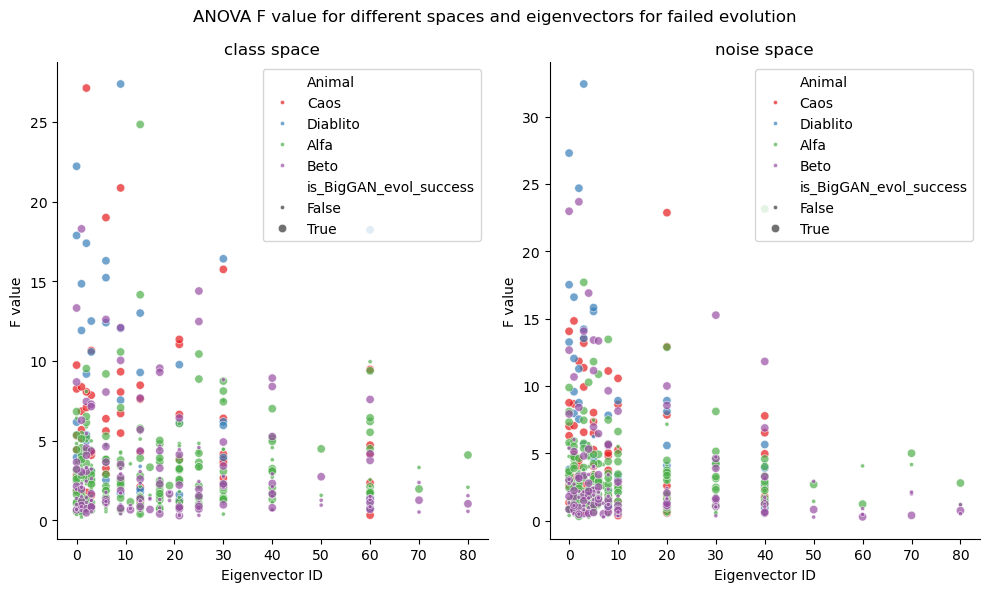

In [41]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

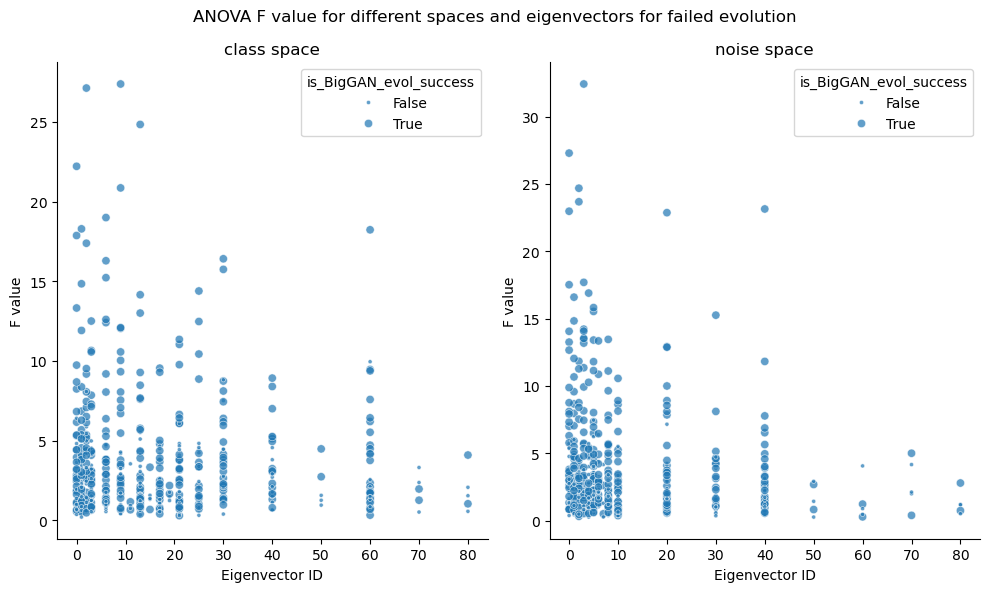

In [42]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

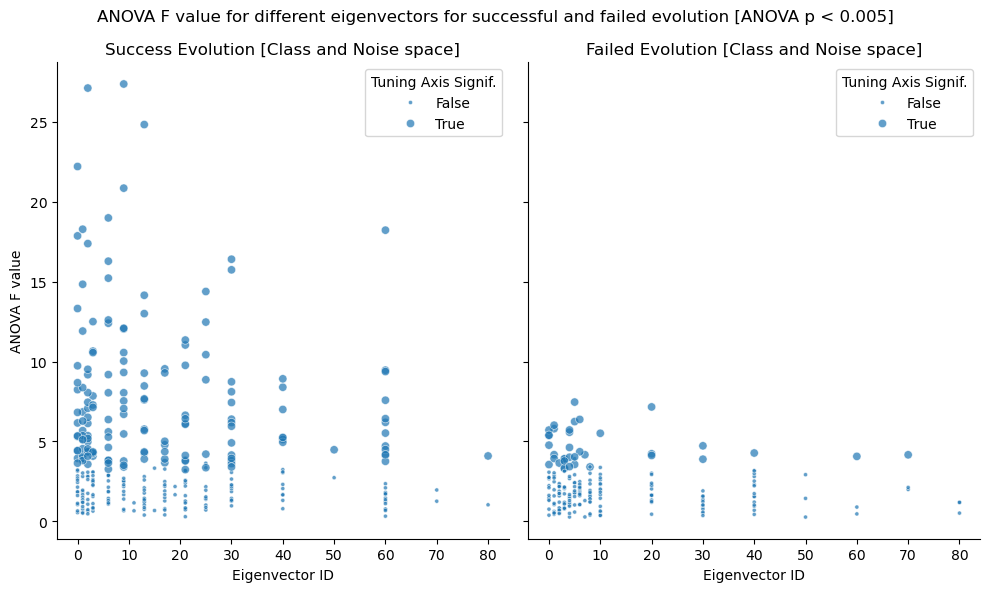

In [51]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("is_BigGAN_evol_success")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('Success Evolution [Class and Noise space]')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('ANOVA F value')
ax[0].legend(title='Tuning Axis Signif.')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("not is_BigGAN_evol_success")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('Failed Evolution [Class and Noise space]' )
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('ANOVA F value')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('ANOVA F value for different eigenvectors for successful and failed evolution [ANOVA p < 0.005]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_eigen_sep", figh=fig)
plt.show()

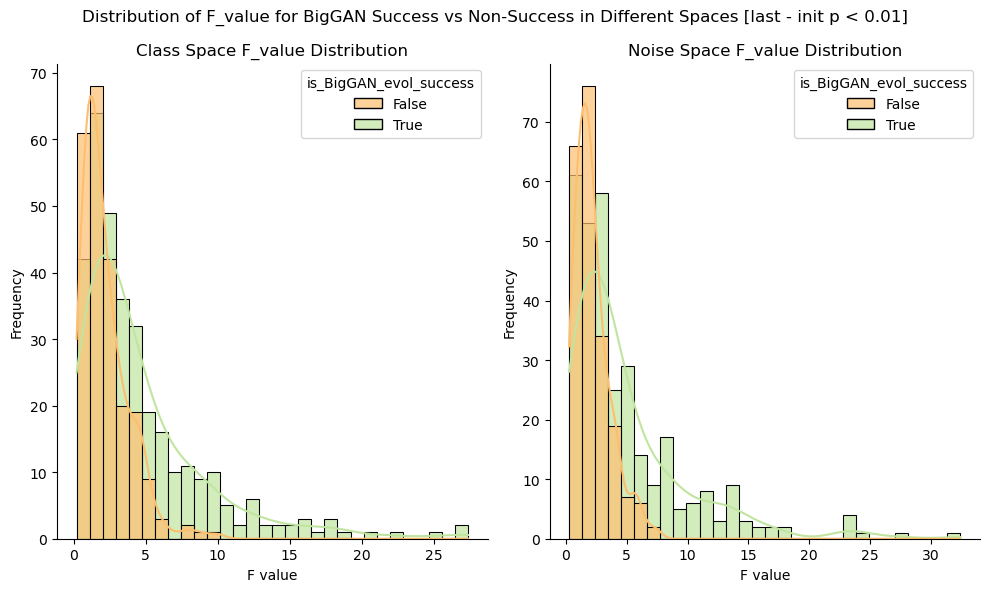

In [33]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# Plot histogram for class space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[0], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[0].set_title('Class Space F_value Distribution')
ax[0].set_xlabel('F value')
ax[0].set_ylabel('Frequency')

# Plot histogram for noise space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[1], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[1].set_title('Noise Space F_value Distribution')
ax[1].set_xlabel('F value')
ax[1].set_ylabel('Frequency')

fig.suptitle(f'Distribution of F_value for BigGAN Success vs Non-Success in Different Spaces [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_hist_cmp_space_cmp", figh=fig)
plt.show()


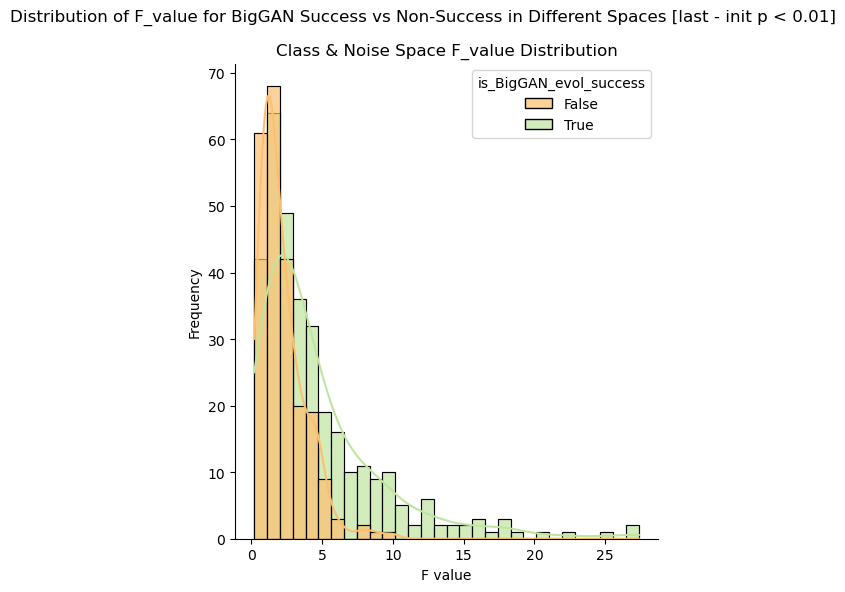

In [35]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
# Plot histogram for class space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax, palette="Spectral", bins=30, kde=True, alpha=0.7)
ax.set_title('Class & Noise Space F_value Distribution')
ax.set_xlabel('F value')
ax.set_ylabel('Frequency')

fig.suptitle(f'Distribution of F_value for BigGAN Success vs Non-Success in Different Spaces [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_hist_cmp", figh=fig)
plt.show()

### Peak location change 

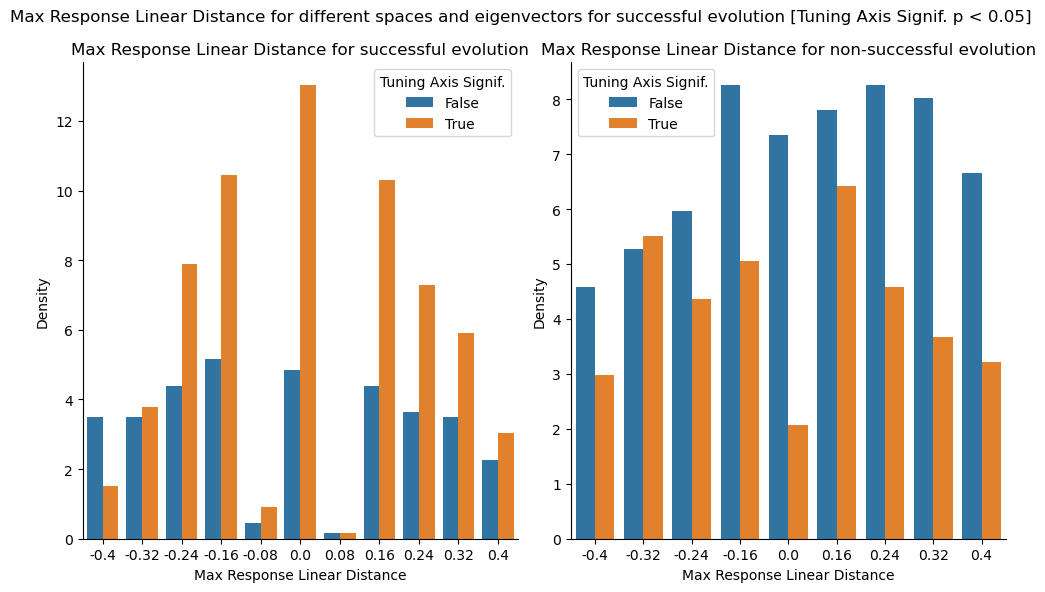

In [59]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.05
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')
ax[0].legend(title='Tuning Axis Signif.')

sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution [Tuning Axis Signif. p < 0.05]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_nomerge_p005", figh=fig)
plt.show() 

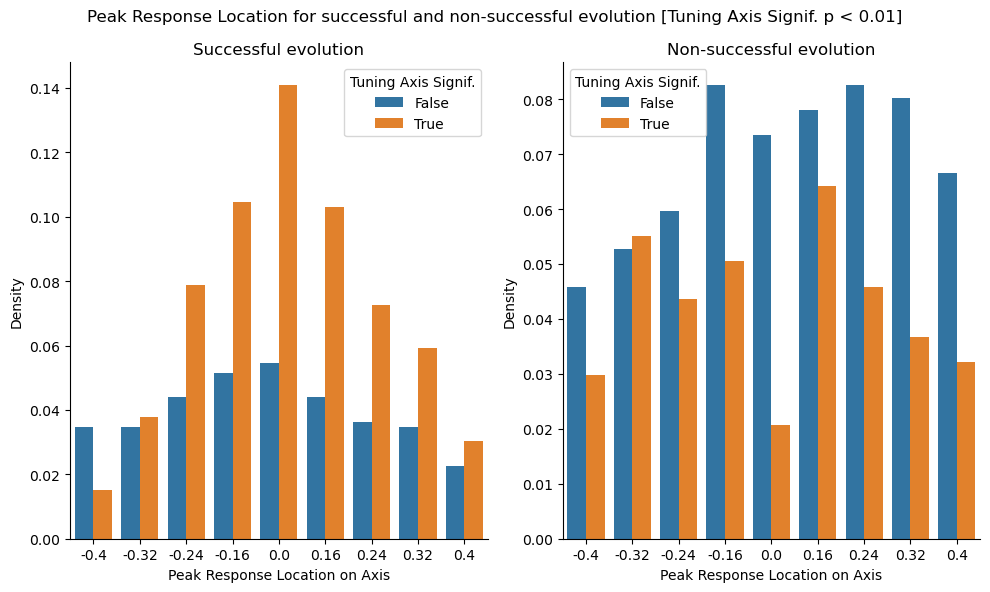

In [60]:
import seaborn as sns
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
# [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4] 
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.05
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
              x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Successful evolution')
ax[0].set_xlabel('Peak Response Location on Axis')
ax[0].set_ylabel('Density')
ax[0].legend(title='Tuning Axis Signif.')

sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
              x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Non-successful evolution')
ax[1].set_xlabel('Peak Response Location on Axis')
ax[1].set_ylabel('Density')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < 0.01]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_merge_p005", figh=fig)
plt.show() 

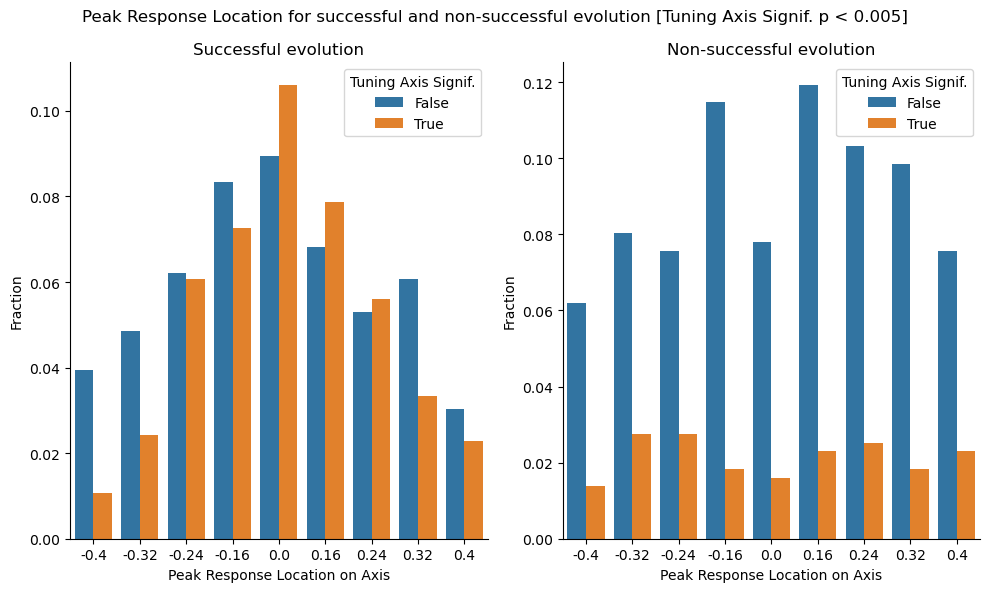

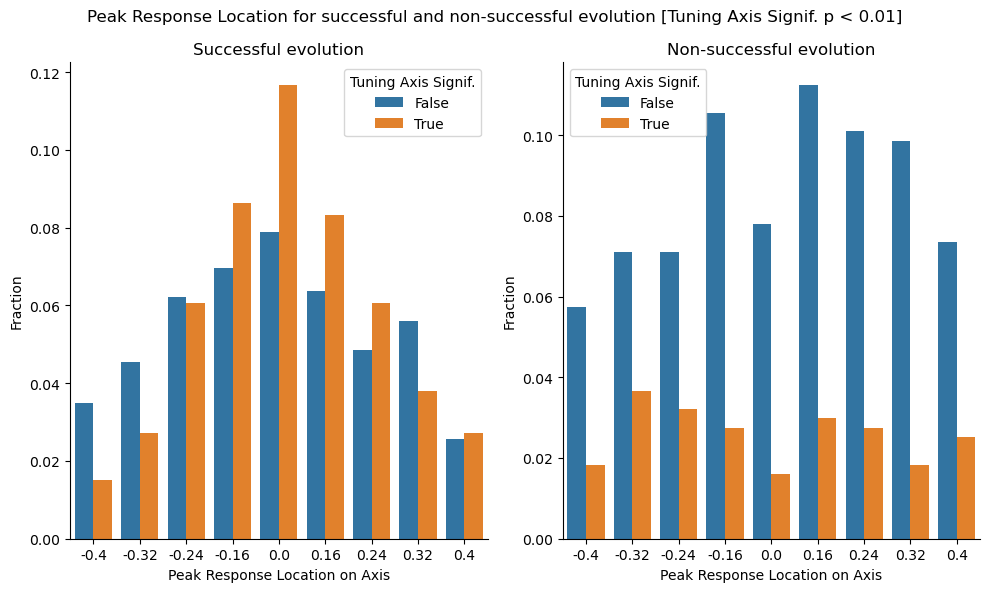

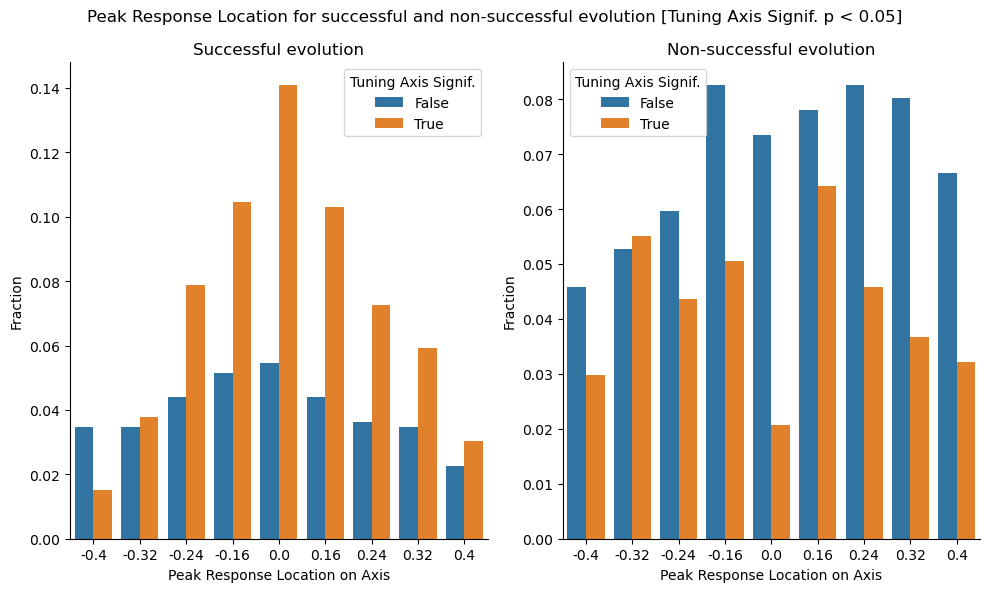

In [62]:
import seaborn as sns
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
# [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4] 
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


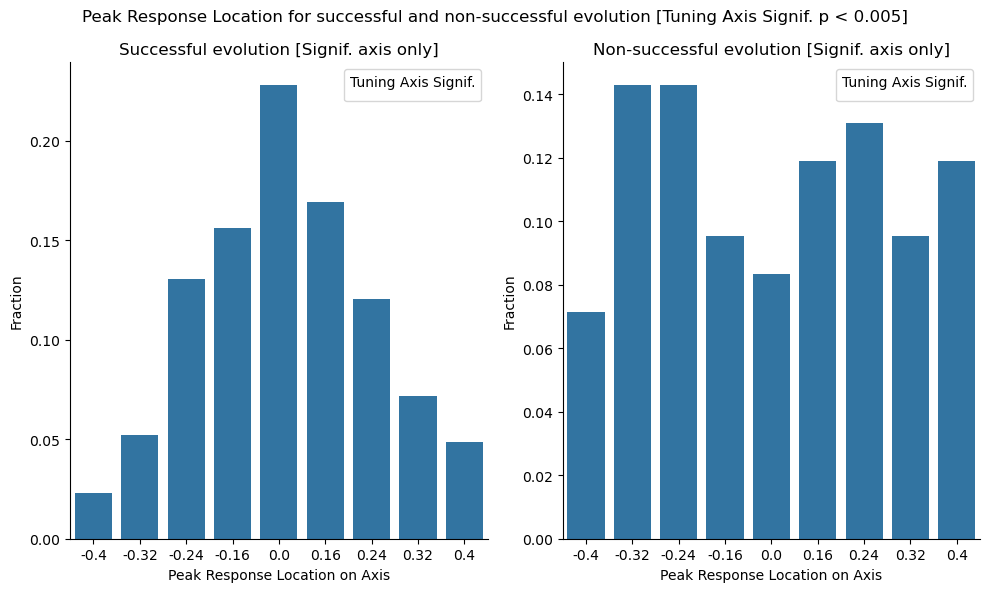

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


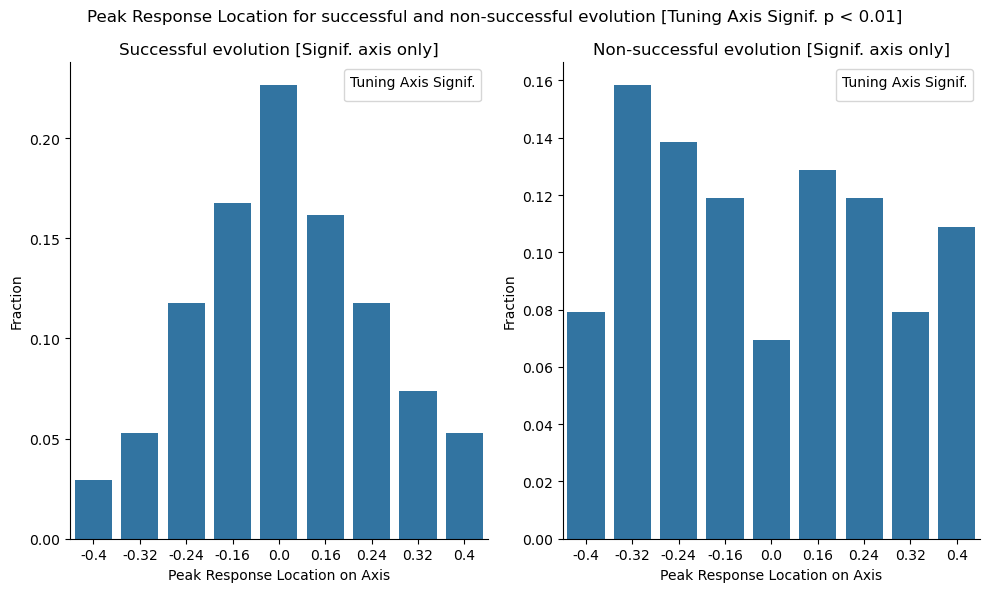

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


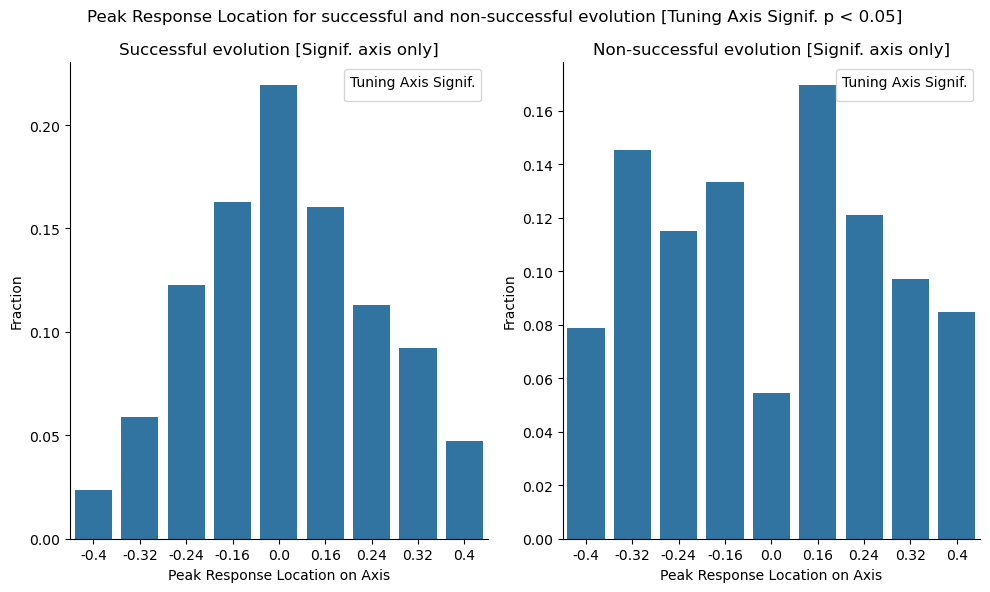

In [63]:
import seaborn as sns
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
# [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4] 
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution [Signif. axis only]')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution [Signif. axis only]')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_signif_only_merge_p{pval_threshold}", figh=fig)
    plt.show() 

### Tuning axes shape plot

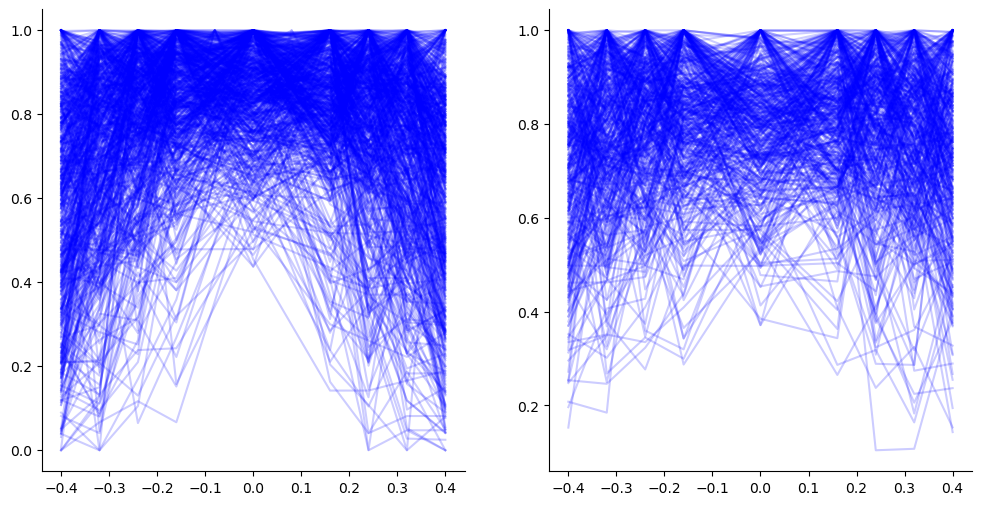

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  ").iterrows():
    axs[0].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='blue', alpha=0.2)

for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  ").iterrows():
    axs[1].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='blue', alpha=0.2)
plt.show()

In [ ]:
import seaborn as sns
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution [Signif. axis only]')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution [Signif. axis only]')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_signif_only_merge_p{pval_threshold}", figh=fig)
    plt.show() 

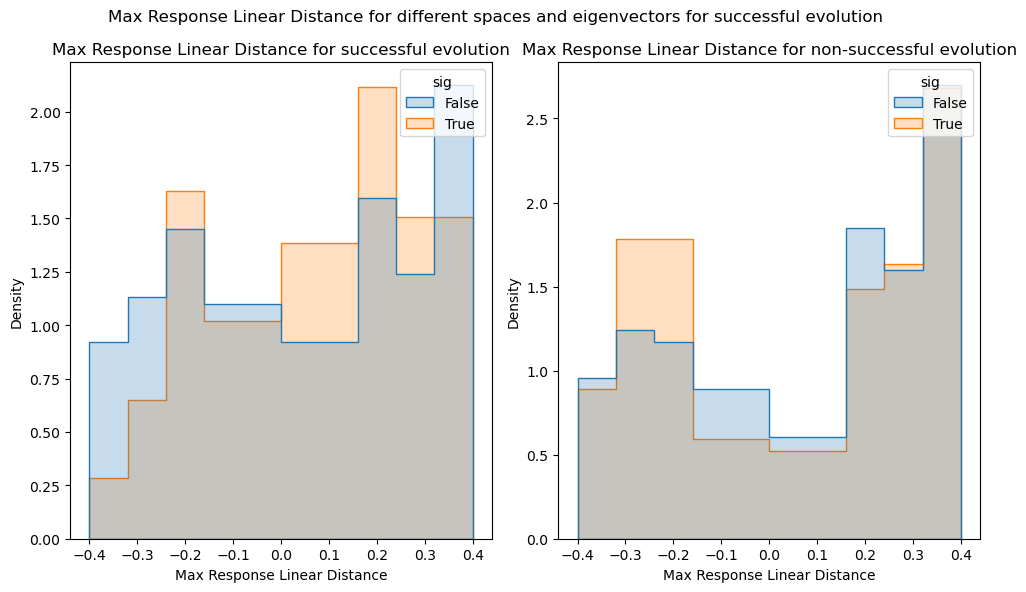

In [40]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[0], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')

sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[1], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')

# sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
#                 hue="prefchan", palette="Spectral",
#                 style='sig',  markers={True: "o", False: "."}, alpha=0.7)
# ax[1].set_title('noise space')
# ax[1].set_xlabel('Eigenvalue ID')
# ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

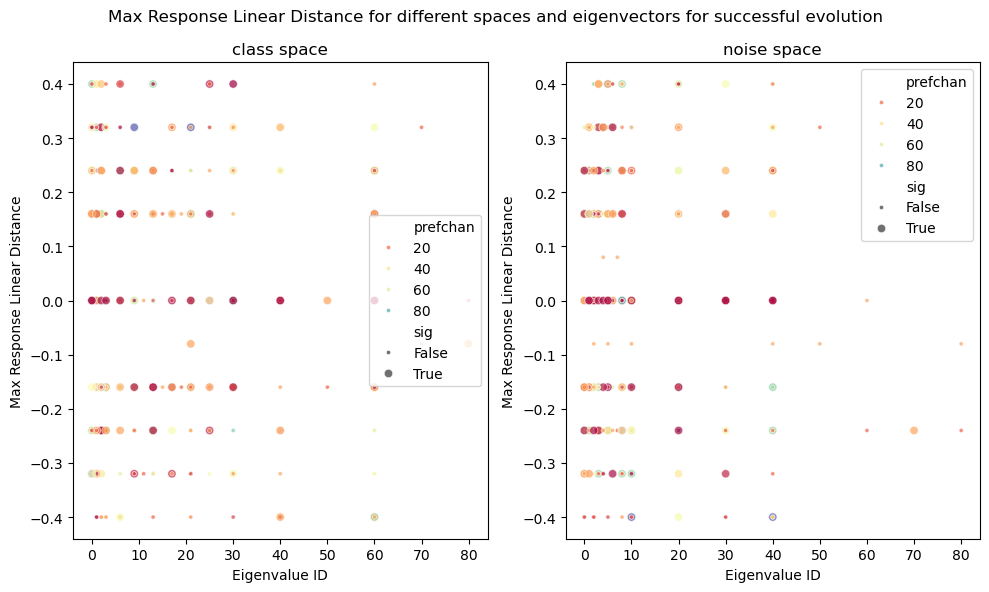

In [ ]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

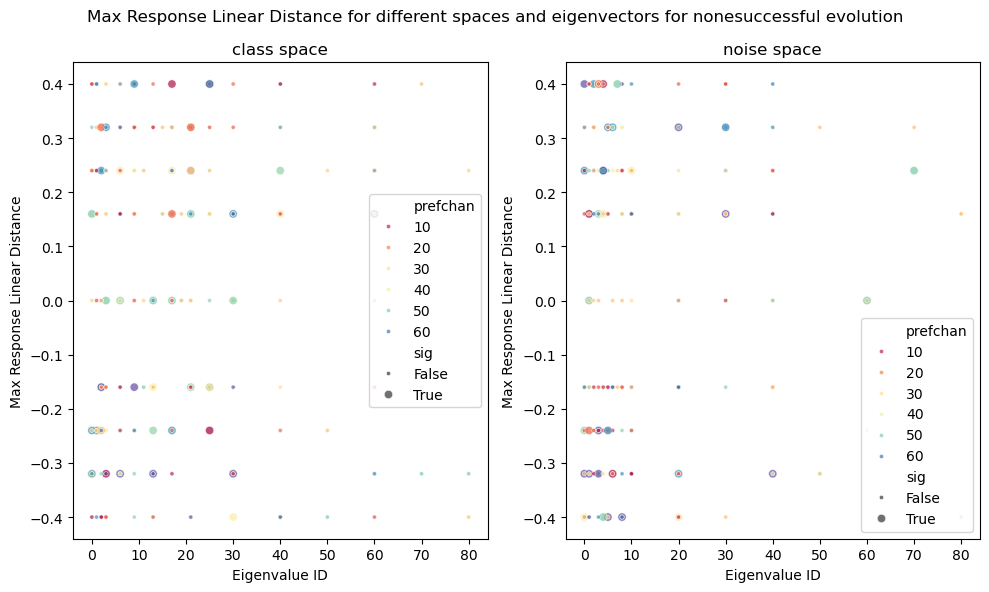

In [ ]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for nonesuccessful evolution')
plt.tight_layout()
plt.show()
# %%

In [ ]:
tuning_stats_synopsis_df.lin_dist_set.iloc[0]


[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]